## Kullback-Leibler Divergence Explained

In this post we're going to take a look at a way of comparing two probability distributions called Kullback-Leibler Divergence (often shortened to just KL divergence). Very often in Probability and Statistics we'll replace observed data or a complex distributions with a simpler, approximating(近似) distribution. KL Divergence helps us to measure just how much information we lose when we choose an approximation.

Let's start our exploration by looking at a problem. Suppose that we're space-scientists visiting a distant(遥远的), new planet and we've discovered a species of biting worms(蠕虫) that we'd like to study. We've found that these worms have 10 teeth, but because of all the chomping away, many of them end up missing teeth. After collecting many samples we have come to this empirical probability distribution of the number of teeth in each worm:

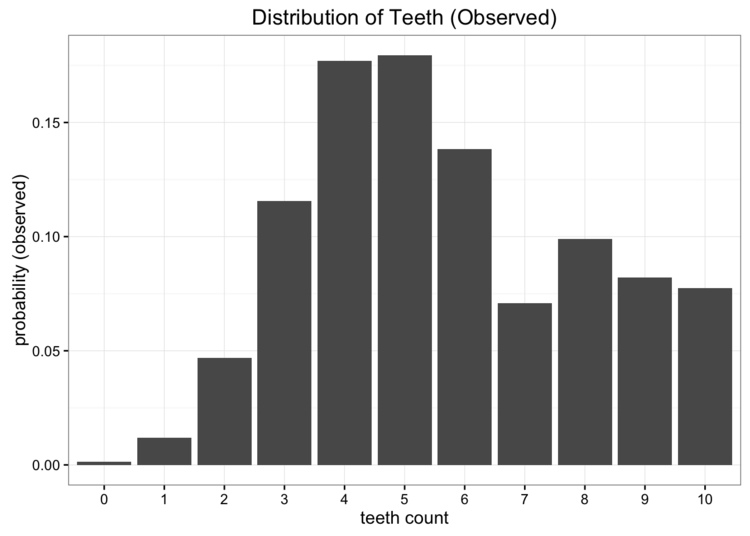

While this data is great, we have a bit of a problem. We're far from Earth and sending data back home is expensive. What we want to do is reduce this data to a simple model with just one or two parameters. One option is to represent the distribution of teeth in worms as just a uniform distribution(平均分布). We know there are 11 possible values and we can just assign the uniform probability of $\frac{1}{11}$ to each of these possibilities. 

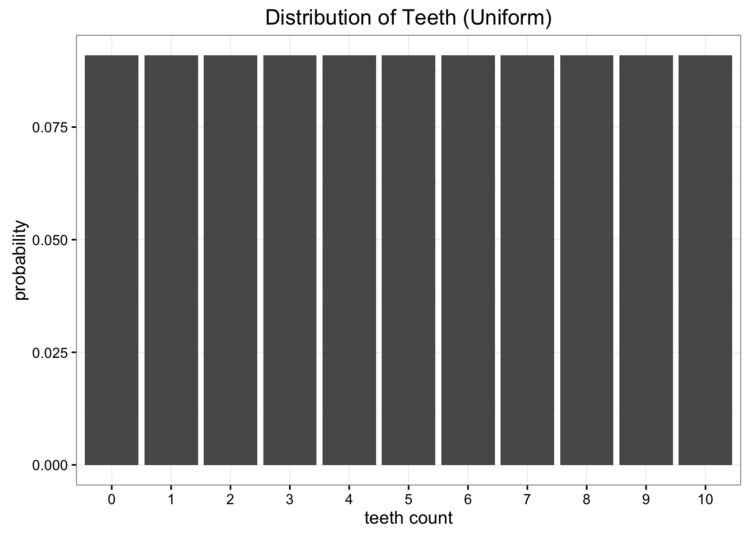

Clearly our data is not uniformly distributed, but it also doesn't look too much like any common distributions we know. Another option we could try would be to model our data using the Binomial distribution(二项分布). In this case all we need to do is estimate that probability parameter of the Binomial distribution. We know that if we have $n$ trials and a probabily is $p$ then the expectation is just $E[x]=n\cdot p$. In the case $n=10$, and the expectation is just the mean of our data, which we'll say is 5.7, so our best estimate of p is 0.57. That would give us a binomal distribution that looks like this:

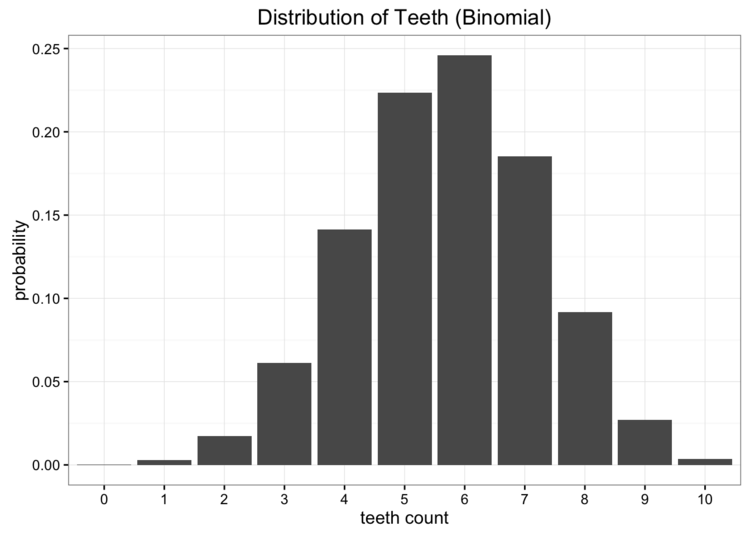

Our binomial approximation has more subtlely, but doesn't perfectly model our data either.

Comparing each of our models with our original data we can see that neither one is the perfect match, but which one is better?

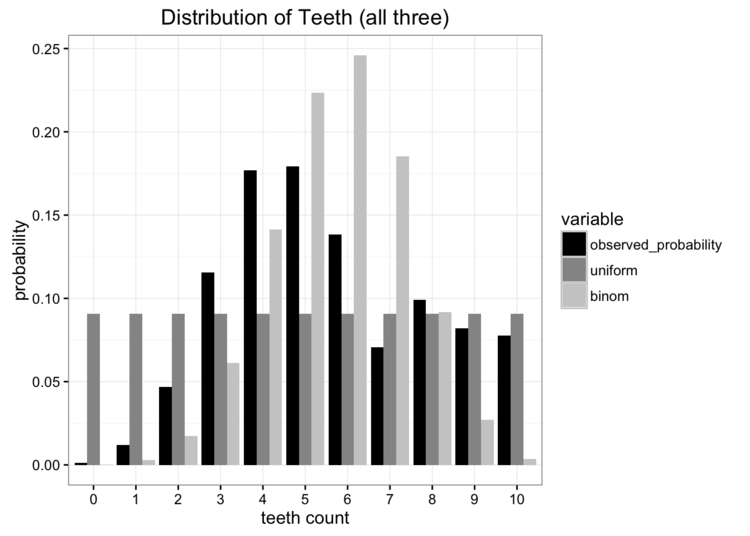

Compared with the original data, it's clear that both approximations are limited. How can we choose which one to use?

There are plenty of existing error metrics(指标), but our primary concern is with minimizing the amount of information we have to send. Both of these models reduce our problem to two parameters, number teeth and a probability (though we really only need the number of teeth for the uniform distribution). The best test of which is better is to ask which distribution preserves the most information from our original data source. This is where Kullback-Leibler Divergence comes in.

### The entropy of our distribution

KL Divergence has its origins in information theory. The primary goal of information theory is to quantify how much information is in data. The most important metric in information theory is called Entropy, typically denoted as $H$. The definition of Entropy for a probability distribution is:

$$H=-\sum_{i=1}^N p(x_i) \cdot \text{log} p(x_i)$$

If we use $\text{log}_2$ for our calculation we can interpret entropy as "the minimum number of bits it would take us to encode our information". In this case, the information would be each observation of teeth counts given our empirical distribution. Given the data that we have observed, our probability distribution has an entropy of 3.12 bits.  The number of bits tells us the lower bound for how many bits we would need, on average, to encode the number of teeth we would observe in a single case.

What entropy doesn't tell us is the optimal encoding scheme to help us achieve this compression. Optimal encoding of information is a very interesting topic, but not necessary for understanding KL divergence. **The key thing with Entropy is that, simply knowing the theoretical lower bound on the number of bits we need,** we have a way to quantify exactly how much information is in our data. Now that we can quantify this, we want to quantify how much information is lost when we substitute(替代) our observed distribution for a parameterized approximation. 

### Measuring information lost using Kullback-Leibler Divergence

Kullback-Leibler Divergence is just a slight modification of our formula for entropy. Rather than just having our probability distribution $p$ we add in our approximating distribution $q$. Then we look at the difference of the log values for each:

$$D_{KL}(p\Vert q)=\sum_{i=1}^N p(x_i)\cdot (\text{log}p(x_i)-\text{log}q(x_i))$$

Essentially, what we're looking at with the KL divergence is the expectation(期望) of the log difference between the probability of data in the original distribution with the approximating distribution. Again, if we think in terms of $\text{log}_2$ we can interpret this as "how many bits of information we expect to lose". We could rewrite our formula in terms of expectation:

$$D_{KL}(p\Vert q)=E[\text{log}p(x)-\text{log}q(x)]$$

The more common way to see KL divergence written is as follows:

$$D_{KL}(p\Vert q)=\sum_{i=1}^N p(x_i)\cdot \text{log} \frac{p(x_i)}{q(x_i)}$$

With KL divergence we can calculate exactly how much information is lost when we approximate one distribution with another. Let's go back to our data and see what the results look like.

### Comparing our approximating distributions

Now we can go ahead and calculate the KL divergence for our two approximating distributions. For the uniform distribution we find:

$$D_{kl}(\text{Observed }\Vert \text{ Uniform}) = 0.338$$

And for our Binomial approximation:

$$D_{kl}(\text{Observed }\Vert \text{ Binomial}) = 0.477D$$

As we can see the information lost by using the Binomial approximation is greater than using the uniform approximation. If we have to choose one to represent our observations, we're better off sticking with the Uniform approximation.

### Divergence not distance

It may be tempting to(很想) think of KL Divergence as a distance metric, however we cannot use KL Divergence to measure the distance between two distributions.  The reason for this is that KL Divergence is *not symmetric*.  For example we if used our observed data as way of approximating the Binomial distribution we get a very different result:

$$D_{kl}( \text{Binomial}\Vert \text{Observed}) = 0.330$$

Intuitively this makes sense as in each of these cases we're doing a very different form(形式) of approximation.

### Optimizing using KL Divergence

When we chose our value for the Binomial distribution we chose our parameter for the probability by using the expected value that matched our data. But since we're optimizing for minimizing information loss, it's possible this wasn't really the best way choose the parameter. We can double check our work by looking at the way KL Divergence changes as we change our values for this parameter. Here's a chart of how those values change together:

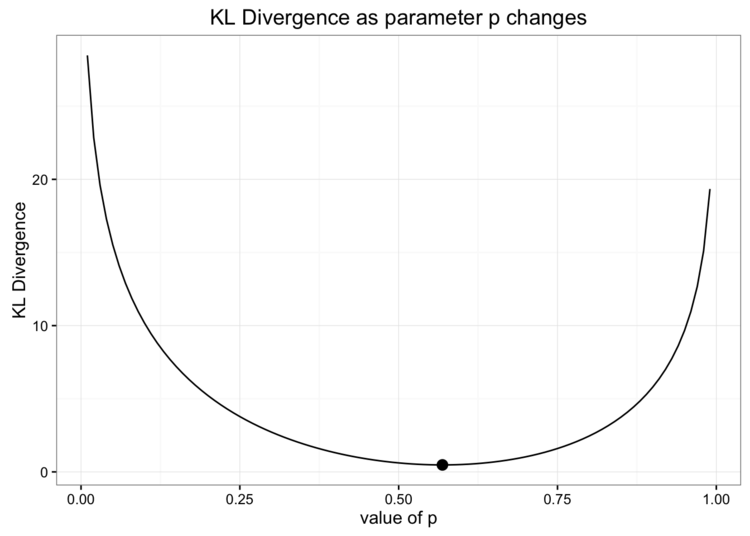

As you can see, our estimate for the binomial distribution (marked by the dot) was the best estimate to minimize KL divergence.

Suppose we wanted to create an ad hoc distribution to model our data.  We'll split the data in two parts. The probabilities for 0-5 teeth and the probabilities for 6-10 teeth. Then we'll use a single parameter to specify what percentage of the total probability distribution falls on the right side of the distribution. For example if we choose 1 for our parameter then 6-10 will each have a probability of 0.2 and everything in the 0-5 group would have a probability of 0. So basically:

$$[6,11]=\frac{p}{5};[0,5]=\frac{1-p}{6}$$